# Démonstration du Système de Recommandation
**Objectif** : Montrer l'installation, l'utilisation et les tests du système.

## 1. Importer les outils

In [5]:
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from pathlib import Path


project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

from src.data_loader import load_ratings
from src.recommender import Recommender
from src.data_loader import load_ratings
from src.recommender import Recommender

## 2. Charger les données

In [9]:
ratings_path = project_root / 'data' / 'user_ratings.csv'

# Charger les données générées
ratings = load_ratings(str(ratings_path))

# Afficher un aperçu
print("Aperçu des données :")
display(ratings.head())

# Vérifier les dimensions
assert ratings.shape == (100, 20), "Erreur : Dimensions incorrectes !"

Aperçu des données :


,product_0,product_1,product_2,product_3,product_4,product_5,product_6,product_7,product_8,product_9,product_10,product_11,product_12,product_13,product_14,product_15,product_16,product_17,product_18,product_19
user_id,,,,,,,,,,,,,,,,,,,,
0,4,2,4,5,<NA>,<NA>,2,5,<NA>,<NA>,<NA>,3,<NA>,2,<NA>,4,<NA>,4,<NA>,1
1,<NA>,5,3,5,1,2,4,1,4,2,2,1,2,<NA>,2,4,<NA>,4,<NA>,5
2,<NA>,1,4,2,4,2,2,<NA>,5,<NA>,2,4,2,2,4,4,<NA>,5,<NA>,2
3,5,2,<NA>,4,<NA>,4,<NA>,1,5,5,1,1,1,1,4,3,3,1,<NA>,3
4,<NA>,3,5,2,2,1,4,1,<NA>,2,<NA>,5,3,4,3,3,<NA>,3,5,3


## 3. Utiliser le moteur de recommandation

/home/hardocorelearner/recoSys/recommandationSystem/src/recommender.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.ratings = ratings.fillna(0)  # Remplacer NaN par 0 pour le calcul de similarité


🔍 Recommandations pour l'utilisateur 0 : ['product_9', 'product_5', 'product_12', 'product_8', 'product_10']


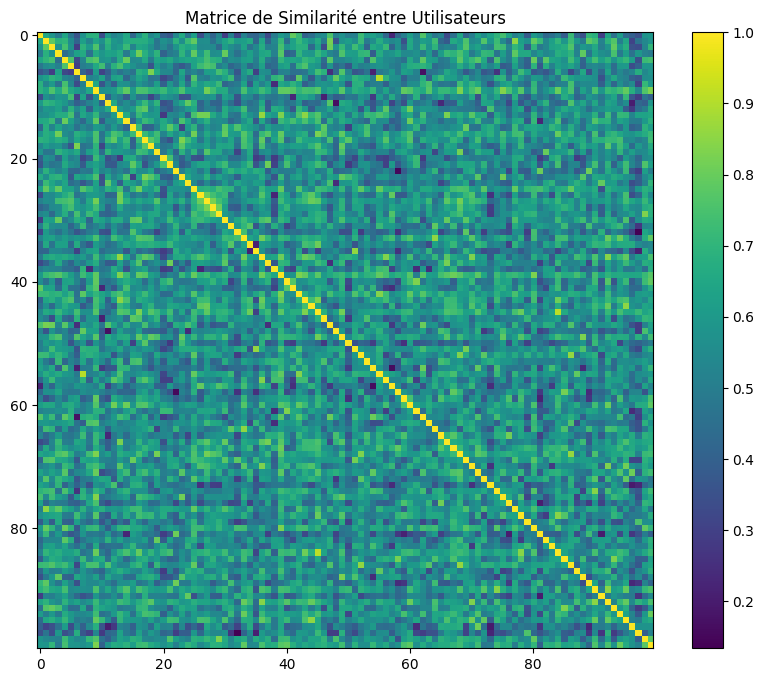

In [10]:
# Initialiser le moteur
recommender = Recommender(ratings)

# Générer des recommandations
user_id = 0
recommendations = recommender.recommend(user_id, n_recommendations=5)
print(f"🔍 Recommandations pour l'utilisateur {user_id} : {recommendations}")

# Visualiser la similarité entre utilisateurs
plt.figure(figsize=(10, 8))
plt.imshow(recommender.user_similarity, cmap='viridis')
plt.title("Matrice de Similarité entre Utilisateurs")
plt.colorbar()
plt.show()

## 4. Exécuter les tests automatisés

In [1]:
import os
import sys

# Chemin ABSOLU vers le dossier racine du projet
PROJECT_ROOT = os.path.abspath(os.path.join(".."))
print("Répertoire racine détecté :", PROJECT_ROOT)

# Ajout du répertoire racine au PYTHONPATH
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

# Vérification des chemins
print("\nChemins Python actuels :")
for path in sys.path:
    print(path)

Répertoire racine détecté : /home/hardocorelearner/recoSys/recommandationSystem

Chemins Python actuels :
/home/hardocorelearner/recoSys/recommandationSystem
/usr/lib/python310.zip
/usr/lib/python3.10
/usr/lib/python3.10/lib-dynload

/home/hardocorelearner/recoSys/recommandationSystem/venv/lib/python3.10/site-packages
/home/hardocorelearner/recoSys/recommandationSystem/src


In [2]:
# Se déplacer dans le répertoire racine (simule le comportement CLI)
%cd {PROJECT_ROOT}

# Lancer les tests avec la même configuration que la CLI
!PYTHONPATH=$PYTHONPATH:. pytest test/ -v

/home/hardocorelearner/recoSys/recommandationSystem


/home/hardocorelearner/recoSys/recommandationSystem/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-8.3.5, pluggy-1.5.0 -- /home/hardocorelearner/recoSys/recommandationSystem/venv/bin/python3
cachedir: .pytest_cache
rootdir: /home/hardocorelearner/recoSys/recommandationSystem
plugins: anyio-4.9.0, Faker-37.1.0
collected 8 items                                                              

test/test_data_loading.py::test_load_ratings_basic PASSED                [ 12%]
test/test_data_loading.py::test_load_ratings_invalid_path PASSED         [ 25%]
test/test_performance.py::test_recommendation_performance PASSED         [ 37%]
test/test_recommender.py::test_recommendations_for_user_with_unrated_products PASSED [ 50%]
test/test_recommender.py::test_no_recommendations_when_all_rated PASSED  [ 62%]
test/test_recommender.py::test_recommendations_avoid_already_rated_products PASSED [ 75%]
test/test_recommender.py::test_recommendations_for_user_with_no_similar_users PASSE